In [ ]:
import pandas as pd
import re
import string
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import nltk.data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 Amazon_Reviews_ETL.ipynb		    NLP_numbers_withnan.csv
'articles (1).csv'			    normalized_df.csv
'articles (3).csv'			   'normalized_df(J21).csv'
 Challenge16.ipynb			   'normalized_df(J22).csv'
 Copy_of_model_training.ipynb		    Pipleine.ipynb
'Copy of NLP_model_training (1).ipynb'	    pos_tag_ndf1.csv
'Copy of NLP_model_training.ipynb'	   'pos_tag_ndf1(J21).csv'
'Copy of NLP_model_training(Jul21).ipynb'  'pos_tag_ndf1(J22).csv'
'Copy of Pipleine.ipynb'		    true_100_2.csv
'Copy of Untitled2.ipynb'		    true_100.csv
 ETL.ipynb				    Untitled
'Example 1.ipynb'			    Untitled0.ipynb
 fake_100_2.csv				   'Untitled (1)'
 fake_100.csv				    Untitled11.ipynb
 Nida_model_training.ipynb		    Untitled12.ipynb
 NLP.csv				    Untitled1.ipynb
'NLP_df_final(J21).csv'			   'Untitled (2)'
'NLP_df_final(J22).csv'			    Untitled2.ipynb
'NLP_df_finalnum(J21).csv'		    Untitled3.ipynb
'NLP_df_finalnum(J22).csv'		    Untitled4.ipynb
 NLP_draft.ipynb			    Untitled5.ipynb
 NLP.ipynb				    Untitled6.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/articles (1).csv', index_col=0) 
df

,articlesid,fakeid,trueid,title,text,subject,label
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1
...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0
37647,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0
37648,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0
37649,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0


In [ ]:
df["article"] = df["title"] +" "+ df['text']
df

,articlesid,fakeid,trueid,title,text,subject,label,article
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...
37647,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...
37648,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...
37649,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...


In [ ]:
# df.loc[0,'article']
# Replacing U.S and U.S. with USA

df['title_1'] = df['title'].str.replace('U.S.', 'USA').str.replace('U.S', 'USA').str.replace(' US ', ' USA ')
df['text_1'] = df['text'].str.replace('U.S.', 'USA').str.replace('U.S', 'USA').str.replace(' US ', ' USA ')
df['article_1'] = df['article'].str.replace('U.S.', 'USA').str.replace('U.S', 'USA').str.replace(' US ', ' USA ')
df

,articlesid,fakeid,trueid,title,text,subject,label,article,title_1,text_1,article_1
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,'Fully committed' NATO backs new USA approach ...,BRUSALS (Reuters) - NATO allies on Tuesday wel...,'Fully committed' NATO backs new USA approach ...
37647,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",LexisNexis withdrew two products from Chinese ...
37648,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,Minsk cultural hub becomes haven from authorit...
37649,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,Vatican upbeat on possibility of Pope Francis ...


In [ ]:
import re
@np.vectorize
def wordpre(title):
    title = title.lower()
    title = re.sub('(?<!\w)([A-Za-z])\.', r'\1', title) #Cathy's
    title = re.sub('“|’|"|”', '', title) # Cathy's
    title = re.sub('\[.*?\]', '', title)
    title = re.sub("\\W"," ",title) # remove special chars
    title = re.sub('https?://\S+|www\.\S+', '', title)
    title = re.sub('<.*?>+', '', title)
    title = re.sub('[%s]' % re.escape(string.punctuation), '', title)
    title = re.sub('\n', '', title)
    title = re.sub('\w*\d\w*', '', title)
    
    return title


In [ ]:
##  Applying the word-preprocessing function to the dataset
df['text_wordpre']= df['text_1'].apply(wordpre)
df['title_wordpre']= df['title_1'].apply(wordpre)
df['article_wordpre']= df['article_1'].apply(wordpre)
df

,articlesid,fakeid,trueid,title,text,subject,label,article,title_1,text_1,article_1,text_wordpre,title_wordpre,article_wordpre
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,'Fully committed' NATO backs new USA approach ...,BRUSALS (Reuters) - NATO allies on Tuesday wel...,'Fully committed' NATO backs new USA approach ...,brusals reuters nato allies on tuesday wel...,fully committed nato backs new usa approach ...,fully committed nato backs new usa approach ...
37647,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,lexisnexis withdrew two products from chinese ...,lexisnexis withdrew two products from chinese ...
37648,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,Minsk cultural hub becomes haven from authorit...,minsk reuters in the shadow of disused sov...,minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...
37649,38644,NaN,21416.0,Vatic

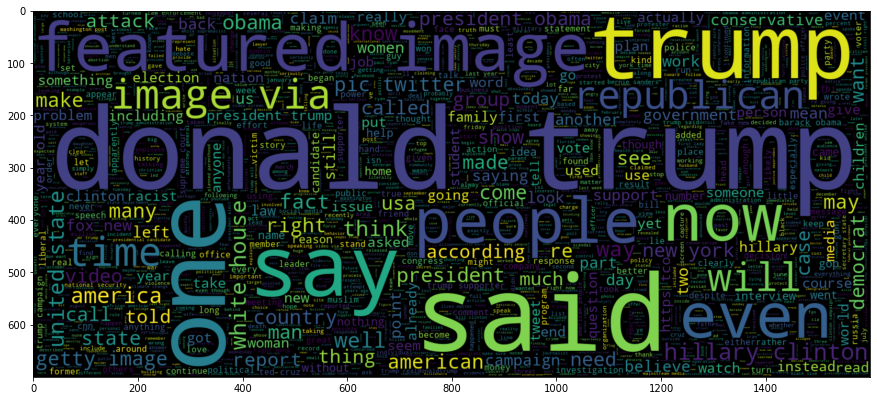

In [ ]:
#word used in fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 1].article_wordpre))
plt.imshow(wc, interpolation="bilinear")

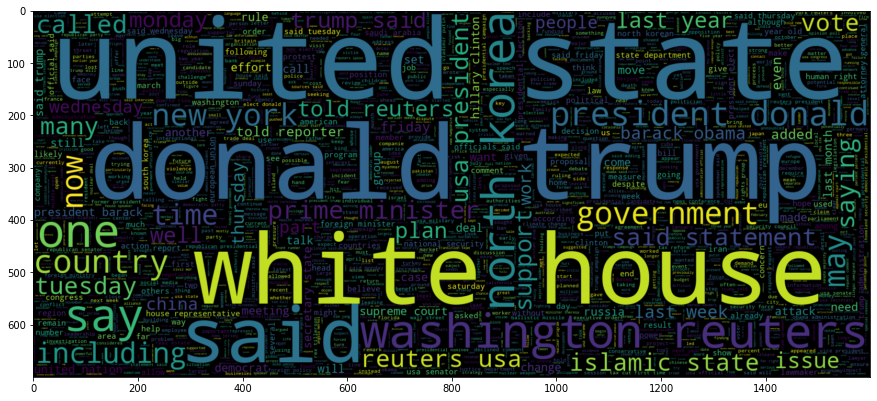

In [ ]:
#word used in true news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 0].article_wordpre))
plt.imshow(wc, interpolation="bilinear")

In [ ]:
#Word count
title_wordcount = df['title_wordpre'].apply(len)
df['title_count']= title_wordcount

text_wordcount = df['text_wordpre'].apply(len)
df['text_count']= text_wordcount

article_wordcount = df['article_wordpre'].apply(len)-1
df['article_count']= article_wordcount

df

,articlesid,fakeid,trueid,title,text,subject,label,article,title_1,text_1,article_1,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,'Fully committed' NATO backs new USA approach ...,BRUSALS (Reuters) - NATO allies on Tuesday wel...,'Fully committed' NATO backs new USA approach ...,brusals reuters nato allies on tuesday wel...,fully committed nato backs new usa approach ...,fully committed nato backs new usa approach ...,60,2789,2849
37647,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,lexisnexis withdrew two products from chinese ...,lexisnexis withdrew two products from chinese ...,52,796,848
37648,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,Minsk cultural hub becomes haven from authorit...,minsk reuters in the shadow of disuse

In [ ]:
#Downloading nltk StopWords and Wordnet 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['title_stop'] = df['title_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text_stop'] = df['text_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['article_stop'] = df['article_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df


,articlesid,fakeid,trueid,title,text,subject,label,article,title_1,text_1,article_1,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new years eve ...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald trump christmas spe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,'Fully committed' NATO backs new USA approach ...,BRUSALS (Reuters) - NATO allies on Tuesday wel...,'Fully committed' NATO backs new USA approach ...,brusals reuters nato allies on tuesday wel...,fully committed nato backs new usa approach ...,fully committed nato backs new usa approach ...,60,2789,2849,fully committed nato backs new usa approach af...,brusals reuters nato alli

In [ ]:
# Top 100 words in true articles
df_true = df.loc[df['label']==0]
dtt = df_true['article_stop']
from collections import Counter
p = Counter(" ".join(dtt).split()).most_common(100)
rsltt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rsltt)

df_t_100 = rsltt
df_t_100

         Word  Frequency
0        said      97255
1       trump      47677
2         usa      44378
3       would      31259
4     reuters      28614
..        ...        ...
95         eu       5539
96       next       5483
97      south       5483
98  democrats       5458
99       make       5430

[100 rows x 2 columns]


,Word,Frequency
0,said,97255
1,trump,47677
2,usa,44378
3,would,31259
4,reuters,28614
...,...,...
95,eu,5539
96,next,5483
97,south,5483
98,democrats,5458


In [ ]:
df_t_100.to_csv("/content/drive/MyDrive/Colab Notebooks/true_100_29.csv")

In [ ]:
# Top 100 words in fake articles
df_fake = df.loc[df['label']==1]

dt = df_fake['article_stop']

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(100)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

df_f_100 = rslt
df_f_100

              Word  Frequency
0            trump      68773
1             said      23639
2           people      20260
3        president      20056
4              one      18130
..             ...        ...
95            good       4177
96          images       4176
97          office       4112
98           court       3980
99  administration       3974

[100 rows x 2 columns]


,Word,Frequency
0,trump,68773
1,said,23639
2,people,20260
3,president,20056
4,one,18130
...,...,...
95,good,4177
96,images,4176
97,office,4112
98,court,3980


In [ ]:
df_f_100.to_csv("/content/drive/MyDrive/Colab Notebooks/fake_100_29.csv")

In [ ]:
# Tokenizing words in title
from nltk import word_tokenize
nltk.download('punkt')
df['title_tokenized'] = df['title_stop'].apply(word_tokenize)
df['text_tokenized'] = df['text_stop'].apply(word_tokenize)
df['article_tokenized'] = df['article_stop'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,articlesid,fakeid,trueid,title,text,subject,label,article,title_1,text_1,article_1,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new years eve ...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year..."
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obamas, name, coded, w..."
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald t

In [ ]:
# length of text and title after tokenizing

#length of title
title_tok_wordcount = df['title_tokenized'].apply(len)
df['title_tokenized_count']= title_tok_wordcount

# length of text
text_tok_wordcount = df['text_tokenized'].apply(len)
df['text_tokenized_count']= text_tok_wordcount

# length of article
article_tok_wordcount = df['article_tokenized'].apply(len)
df['article_tokenized_count']= article_tok_wordcount

df

,articlesid,fakeid,trueid,title,text,subject,label,article,title_1,text_1,article_1,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized,title_tokenized_count,text_tokenized_count,article_tokenized_count
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new years eve ...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year...",9,258,267
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus...",8,183,191
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo...",10,325,335
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obamas, name, coded, w...",8,261,269
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called 

In [ ]:
# POS_Tag features
from tqdm import tqdm
import time

nltk.download('averaged_perceptron_tagger')
ndf = pd.DataFrame()
text = df['article_wordpre'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?


from collections import Counter
for i in tqdm(text): 
    #start = time.time()
    N = nltk.pos_tag(i)
    C = Counter([j for i,j in N])
    S = pd.Series([C])
    N = pd.DataFrame.from_records(S, columns = S.sum().keys())
    ndf = pd.concat([ndf, N], ignore_index=True, sort=False)
    #stop = time.time()
    #print(stop-start, flush=True)
ndf

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


100%|██████████| 37651/37651 [22:29<00:00, 27.90it/s]


,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,NaN,3.0,1.0,NaN,9.0,1.0,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,NaN,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,NaN,1.0,NaN,15.0,6.0,3.0,NaN,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,NaN,2.0,NaN,NaN,13.0,4.0,6.0,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,46.0,98.0,8.0,4.0,11.0,34.0,5.0,36.0,21.0,24.0,17.0,11.0,54.0,27.0,19.0,14.0,NaN,NaN,3.0,3.0,17.0,6.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37647,14.0,38.0,1.0,NaN,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,NaN,3.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37648,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,NaN,1.0,NaN,1.0,11.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37649,27.0,53.0,2.0,NaN,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,2.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ndf

In [ ]:
# replacing NAN with 0
ndf1 = ndf.fillna(0)
ndf1

,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,0.0,3.0,1.0,0.0,9.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,0.0,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,0.0,1.0,0.0,15.0,6.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,46.0,98.0,8.0,4.0,11.0,34.0,5.0,36.0,21.0,24.0,17.0,11.0,54.0,27.0,19.0,14.0,0.0,0.0,3.0,3.0,17.0,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37647,14.0,38.0,1.0,0.0,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,0.0,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37648,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,0.0,1.0,0.0,1.0,11.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37649,27.0,53.0,2.0,0.0,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# new dataframe with sum column
ndf1["sum"] = ndf1.sum(axis=1)
ndf1

,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM,sum
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,477.0
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,0.0,3.0,1.0,0.0,9.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,0.0,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586.0
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,0.0,1.0,0.0,15.0,6.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,46.0,98.0,8.0,4.0,11.0,34.0,5.0,36.0,21.0,24.0,17.0,11.0,54.0,27.0,19.0,14.0,0.0,0.0,3.0,3.0,17.0,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,464.0
37647,14.0,38.0,1.0,0.0,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,0.0,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0
37648,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,0.0,1.0,0.0,1.0,11.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,328.0
37649,27.0,53.0,2.0,0.0,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0


In [ ]:
# normalized dataframe every column divided by sum column
normalized_df = ndf1[['JJ',	'NN',	'VBZ', 'RP', 'VBG', 'VBP' , 'DT',	'RB',	'VB',	'CC',	'PRP','IN',	'VBD','TO',	'PRP$',	'NNS',	'JJS', 'CD','JJR','RBR', 'VBN',	'MD', 'WP',	'FW',	'NNP',	'WRB',	'WDT','PDT',	'EX',	'RBS',	'NNPS',	'UH',	'WP$','POS']].div(ndf1['sum'], axis=0) *100
normalized_df

,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,POS
0,12.159329,21.174004,3.354298,0.419287,1.677149,4.192872,8.176101,7.547170,5.870021,3.144654,4.612159,6.918239,2.306080,2.935010,1.886792,6.708595,0.628931,0.419287,0.419287,0.419287,1.257862,1.048218,1.048218,0.209644,0.419287,0.628931,0.209644,0.209644,0.000000,0.000000,0.0,0.0,0.0,0.0
1,10.903427,30.529595,2.803738,0.311526,3.426791,0.311526,9.345794,3.426791,1.246106,2.492212,2.803738,11.838006,5.607477,2.803738,0.623053,5.295950,0.000000,0.934579,0.311526,0.000000,2.803738,0.311526,0.623053,0.000000,0.311526,0.934579,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,9.897611,26.791809,2.218430,0.511945,1.365188,4.266212,6.484642,3.071672,5.460751,1.535836,5.972696,10.921502,3.242321,3.071672,2.559727,5.802048,0.000000,0.170648,0.341297,0.170648,3.071672,0.853242,0.511945,0.170648,0.341297,0.511945,0.511945,0.000000,0.170648,0.000000,0.0,0.0,0.0,0.0
3,6.373626,32.307692,5.274725,1.098901,1.318681,1.978022,9.670330,5.714286,4.615385,2.197802,2.857143,9.890110,2.417582,2.197802,1.098901,3.516484,0.219780,0.000000,0.219780,0.000000,3.296703,1.318681,0.659341,0.000000,0.439560,0.439560,0.879121,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,6.697460,18.475751,1.847575,0.692841,0.923788,2.771363,9.930716,3.926097,6.235566,3.695150,3.002309,15.011547,4.387991,4.618938,3.464203,7.159353,0.000000,0.461894,0.000000,0.000000,3.002309,0.923788,1.385681,0.000000,0.000000,0.230947,0.461894,0.230947,0.461894,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,9.913793,21.120690,1.724138,0.862069,2.370690,1.077586,7.758621,4.525862,5.172414,3.663793,2.370690,11.637931,5.818966,4.094828,3.017241,7.327586,0.000000,0.000000,0.646552,0.646552,3.663793,1.293103,0.431034,0.000000,0.000000,0.000000,0.862069,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
37647,10.769231,29.230769,0.769231,0.000000,0.769231,0.769231,11.538462,0.769231,2.307692,1.538462,3.076923,13.076923,8.461538,3.076923,1.538462,5.384615,0.000000,2.307692,0.000000,0.769231,3.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
37648,9.756098,23.780488,5.792683,0.914634,0.609756,2.134146,11.585366,3.963415,2.439024,3.658537,3.353659,12.500000,3.658537,1.829268,0.609756,7.012195,0.000000,0.304878,0.000000,0.304878,3.353659,0.304878,0.914634,0.000000,0.304878,0.304878,0.000000,0.000000,0.304878,0.304878,0.0,0.0,0.0,0.0
37649,12.796209,25.118483,0.947867,0.000000,2.369668,0.473934,9.004739,4.265403,4.265403,2.369668,2.843602,14.218009,7.582938,2.843602,0.947867,4.265403,0.000000,0.473934,0.473934,0.000000,1.421801,0.473934,0.947867,0.000000,0.000000,0.473934,0.000000,0.473934,0.947867,0.000000,0.0,0.0,0.0,0.0


In [ ]:
ndf1.to_csv("/content/drive/MyDrive/Colab Notebooks/pos_tag_ndf1(J29).csv")

In [ ]:
normalized_df.to_csv("/content/drive/MyDrive/Colab Notebooks/normalized_df(J29).csv")

In [ ]:
df_dummies = pd.get_dummies(df['subject'])
df_dummies.head(5)

,US News,World News
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df_final = pd.concat([df, df_dummies,normalized_df], axis=1)
# df_final.tail(10)

In [ ]:
df_final.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP_df_final(J29).csv")

In [ ]:
df_final_numbers = df_final.drop(['text','title','article','text_1','title_1','article_1','text_wordpre', 'title_wordpre', 'article_wordpre', 'text_stop', 'title_stop', 'article_stop', 'title_tokenized', 'text_tokenized', 'article_tokenized'], axis = 1)
df_final_numbers

,articlesid,fakeid,trueid,subject,label,title_count,text_count,article_count,title_tokenized_count,text_tokenized_count,article_tokenized_count,US News,World News,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,POS
0,1,1.0,NaN,US News,1,78,2700,2778,9,258,267,1,0,12.159329,21.174004,3.354298,0.419287,1.677149,4.192872,8.176101,7.547170,5.870021,3.144654,4.612159,6.918239,2.306080,2.935010,1.886792,6.708595,0.628931,0.419287,0.419287,0.419287,1.257862,1.048218,1.048218,0.209644,0.419287,0.628931,0.209644,0.209644,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2,2.0,NaN,US News,1,69,1891,1960,8,183,191,1,0,10.903427,30.529595,2.803738,0.311526,3.426791,0.311526,9.345794,3.426791,1.246106,2.492212,2.803738,11.838006,5.607477,2.803738,0.623053,5.295950,0.000000,0.934579,0.311526,0.000000,2.803738,0.311526,0.623053,0.000000,0.311526,0.934579,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,3,3.0,NaN,US News,1,89,3381,3470,10,325,335,1,0,9.897611,26.791809,2.218430,0.511945,1.365188,4.266212,6.484642,3.071672,5.460751,1.535836,5.972696,10.921502,3.242321,3.071672,2.559727,5.802048,0.000000,0.170648,0.341297,0.170648,3.071672,0.853242,0.511945,0.170648,0.341297,0.511945,0.511945,0.000000,0.170648,0.000000,0.0,0.0,0.0,0.0
3,4,4.0,NaN,US News,1,77,2599,2676,8,261,269,1,0,6.373626,32.307692,5.274725,1.098901,1.318681,1.978022,9.670330,5.714286,4.615385,2.197802,2.857143,9.890110,2.417582,2.197802,1.098901,3.516484,0.219780,0.000000,0.219780,0.000000,3.296703,1.318681,0.659341,0.000000,0.439560,0.439560,0.879121,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,5,5.0,NaN,US News,1,70,2346,2416,7,212,219,1,0,6.697460,18.475751,1.847575,0.692841,0.923788,2.771363,9.930716,3.926097,6.235566,3.695150,3.002309,15.011547,4.387991,4.618938,3.464203,7.159353,0.000000,0.461894,0.000000,0.000000,3.002309,0.923788,1.385681,0.000000,0.000000,0.230947,0.461894,0.230947,0.461894,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37646,38641,NaN,21413.0,World News,0,60,2789,2849,8,262,270,0,1,9.913793,21.120690,1.724138,0.862069,2.370690,1.077586,7.758621,4.525862,5.172414,3.663793,2.370690,11.637931,5.818966,4.094828,3.017241,7.327586,0.000000,0.000000,0.646552,0.646552,3.663793,1.293103,0.431034,0.000000,0.000000,0.000000,0.862069,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
37647,38642,NaN,21414.0,World News,0,52,796,848,6,75,81,0,1,10.769231,29.230769,0.769231,0.000000,0.769231,0.769231,11.538462,0.769231,2.307692,1.538462,3.076923,13.076923,8.461538,3.076923,1.538462,5.384615,0.000000,2.307692,0.000000,0.769231,3.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
37648,38643,NaN,21415.0,World News,0,49,1936,1985,5,174,179,0,1,9.756098,23.780488,5.792683,0.914634,0.609756,2.134146,11.585366,3.963415,2.439024,3.658537,3.353659,12.500000,3.658537,1.829268,0.609756,7.012195,0.000000,0.304878,0.000000,0.304878,3.353659,0.304878,0.914634,0.000000,0.304878,0.304878,0.000000,0.000000,0.304878,0.304878,0.0,0.0,0.0,0.0
37649,38644,NaN,21416.0,World News,0,61,1193,1254,7,117,124,0,1,12.796209,25.118483,0.947867,0.000000,2.369668,0.473934,9.004739,4.265403,4.265403,2.369668,2.843602,14.218009,7.582938,2.843602,0.947867,4.265403,0.000000,0.473934,0.473934,0.000000,1.421801,0.473934,0.947867,0.000000,0.000000,0.473934,0.000000,0.473934,0.947867,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_final_numbers.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP_df_finalnum(J29).csv")

# **Entering ML info**

In [ ]:
# # Initial imports
# import pandas as pd
# # from path import Path
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from sklearn.datasets import load_iris

In [ ]:
# #defining the feature set X and y
# X = df_final_numbers.drop(columns=['articlesid',	'fakeid',	'trueid',	'subject','label'])
# y = df_final_numbers['label']

# # # Splitting into Train and Test sets into an 80/20 split.
# # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)
# # model = GaussianNB()
# # model.fit(X_train, y_train)

# # Faiz's code
# # Splitting into Train and Test sets into an 80/20 split.
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)
# model = GaussianNB()
# model.fit(X_train, y_train)

In [ ]:
# ### NEW ADDITION
# y_pred = model.fit(X_train, y_train).predict(X_test)
# print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)*100
# accuracy